# Projeto Análise de estudantes


*   Buscar entender o desempenho dos alunos.

*   Base de Dados: https://www.kaggle.com/datasets/allexanderspb/studentsperformance?resource=download

# Passo a Passo

1.   Compreender o desafio.
2.   Extração dos dados.
3.   Ajustar/Limpar os Dados.
4.   Análise Exploratória.
5.   Análise visual dos dados/Conclusões.


# Passo 1: Compreender o desafio.

Vamos buscar entender, quais são os fatores que levam a um desempenho acadêmico.

# Passo 2: Extração dos dados.

Para iniciar a elaboração das análises, será necessário adicionar as bibliotecas e a base de dados.



*   Adicionando as bibliotecas.



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings



*   Referenciando o local da base de dados.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
Base_Dados = pd.read_csv('StudentsPerformance.csv')

# Comando para saber a dimensão da base de dados.
Base_Dados.shape

(1000, 8)

In [ ]:
# Verificando as primeiras linhas da base
Base_Dados.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Passo 3: Limpar/Ajustar os dados.

Vamos verificar se a base possui dados nulos, no qual pode afetar negativamente as análises. Para isso, foi utilizado um gráfico de calor a seguir, para facilitar a visualização de possíveis dados nulos. Contudo, não houve a necessidade de ajuste na base em questão por não ter dados sem valor.

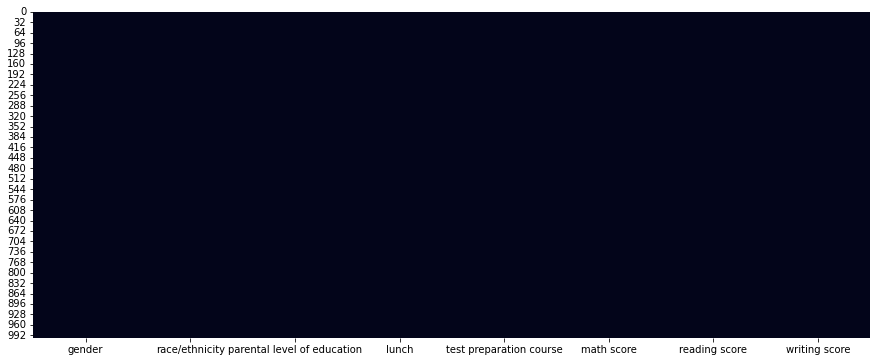

In [ ]:
Nulos = Base_Dados.isnull()
plt.figure(figsize=(15,6))
sns.heatmap(Nulos,cbar = False)



*   Verificar a tipagem dos valores: vamos verificar se a base possui dados com tipagem diferente, por exemplo valores numéricos em formato de texto. Como não houve nada fora do normal, damos continuidade com o projeto.



In [ ]:
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# Passo 4: Análise Exploratória:
Nessa etapa, iremos entender melhor com o que estamos lidando nessa base, entender com profundidade os dados para prosseguir com o projeto.

In [ ]:
#Comando para identificar quantos valores por coluna a base possui
Base_Dados.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64



*   Análise estatística em relação aos valores da base de dados.



In [ ]:
Base_Dados.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000




*   Análise para saber a porcentagem de informações da base por gênero.



In [ ]:
Base_Dados['gender'].value_counts(normalize = True) * 100

female    51.8
male      48.2
Name: gender, dtype: float64



*   Análise para saber a porcentagem de informações da base por raça/etnia.



In [ ]:
Base_Dados['race/ethnicity'].value_counts(normalize = True) * 100

group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: race/ethnicity, dtype: float64

Análise para saber a porcentagem de informações da base por pessoas que fizeram cursos preparatórios.

In [ ]:
Base_Dados['test preparation course'].value_counts(normalize = True) * 100

none         64.2
completed    35.8
Name: test preparation course, dtype: float64

# Passo 5: Análise visual dos dados/Conclusões.

Para concluir, vamos entender visualmente e correlacionar os dados para tirar as conclusões.



*   Utilizando um gráfico chamado Boxplot, no qual busca entender a distribuição dos valores de um determinado dado, vamos analisar o desempenho dos alunos por gênero na matéria matemática.

  É seguro concluir, que a distribuição dos valores para o gênero feminino é significativamente maior, mostrando um desempenho inferior aos alunos do sexo masculino.



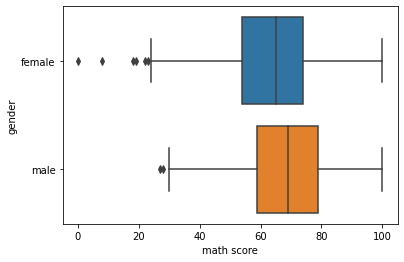

In [ ]:
sns.boxplot(data = Base_Dados,x='math score',y="gender")



*   Ao contrário da análise acima, vemos uma distribuição significativamente maior dos homens quando se trata de leitura, mostrando um melhor desempenho das mulheres nessa matéria, apesar de possuir alguns Outliers.



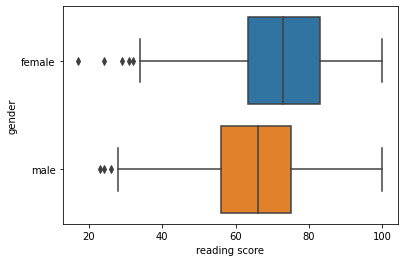

In [ ]:
sns.boxplot(data = Base_Dados,x='reading score',y="gender")



*   Um resultado bastante parecido com o gráfico anterior quando se trata de ter uma boa escrita, porém com um pouco mais de outliers.

    Então, ambos os gêneros se sobresaem em diferentes assuntos, que pode ser ocasionado por questões culturais, sociais, estilo de vida, entre outras várias possíveis causas.

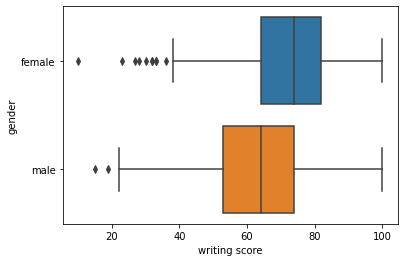

In [ ]:
sns.boxplot(data = Base_Dados,x='writing score',y="gender")



*   Vamos analisar, a correlação de desempenho entre as matérias, em outras palavras, analisar se um aluno que desempenha bem um uma matéria, também desempenha bem em outra.

  Nos gráficos a seguir, apontam uma tendência significativa nos valores, onde mostra que um aluno bom em uma matéria, tem a tendência de ser bom em outra.

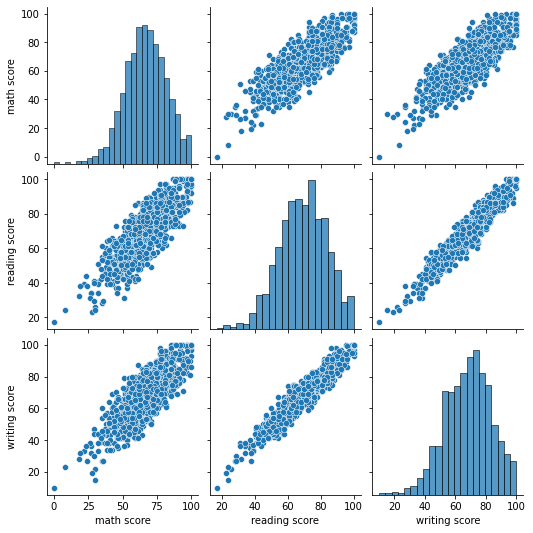

In [ ]:
sns.pairplot( Base_Dados)



*   A seguir, vamos analisar o desempenho dos alunos em matemática em relação ao grau de formação acadêmica dos pais.

  Os gráficos a seguir, apontam que quanto maior o grau de formação dos pais, maior é a tendência de desempenhar bem em matemática.

  A seguir, há a descrição das informações do gráfico em forma de tabela.

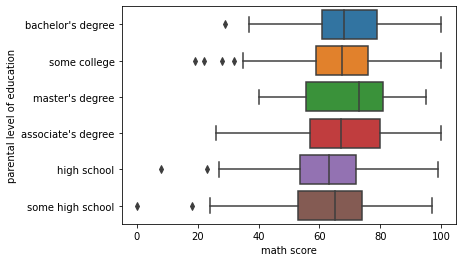

In [ ]:
sns.boxplot (data= Base_Dados,x='math score', y='parental level of education')

In [ ]:
Base_Dados.groupby(by=['parental level of education']).describe()['math score'].reset_index

<bound method DataFrame.reset_index of                              count       mean        std   min    25%   50%  \
parental level of education                                                   
associate's degree           222.0  67.882883  15.112093  26.0  57.00  67.0   
bachelor's degree            118.0  69.389831  14.943789  29.0  61.00  68.0   
high school                  196.0  62.137755  14.539651   8.0  53.75  63.0   
master's degree               59.0  69.745763  15.153915  40.0  55.50  73.0   
some college                 226.0  67.128319  14.312897  19.0  59.00  67.5   
some high school             179.0  63.497207  15.927989   0.0  53.00  65.0   

                              75%    max  
parental level of education               
associate's degree           80.0  100.0  
bachelor's degree            79.0  100.0  
high school                  72.0   99.0  
master's degree              81.0   95.0  
some college                 76.0  100.0  
some high school           



*   Por último, vamos analisar o desempenho em matemática levando em consideração se os alunos fizeram ou não cursos preparatórios.

  Os gráficos apontam uma distribuição menor para os alunos que fizeram cursos preparatórios, destacando uma melhor performance em relação aos alunos que não estudaram por cursos preparatórios.

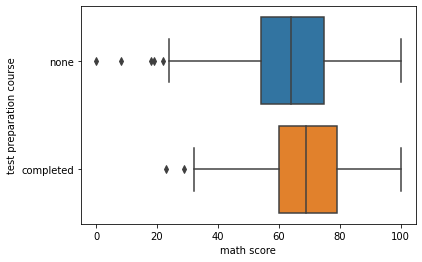

In [ ]:
sns.boxplot (data= Base_Dados,x='math score', y='test preparation course')

In [ ]:
Base_Dados.groupby(by=['test preparation course']).describe()['math score'].reset_index()

,test preparation course,count,mean,std,min,25%,50%,75%,max
0,completed,358.0,69.695531,14.444699,23.0,60.0,69.0,79.00,100.0
1,none,642.0,64.077882,15.192376,0.0,54.0,64.0,74.75,100.0
